<a href="https://colab.research.google.com/github/GavinEBinder/MachineLearningProjects/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
counts = df['Class'].value_counts()
print(counts)

Class
0    284315
1       492
Name: count, dtype: int64


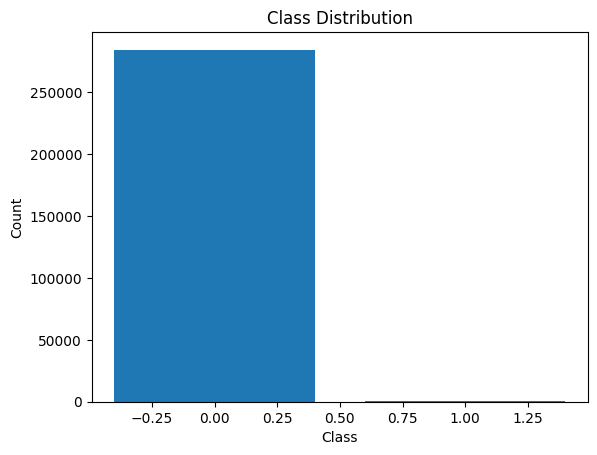

In [6]:
plt.bar(counts.index, counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Some notes:

There are no null values

Very little fraud cases (1). Far too imbalanced, so any predictive model would assume not fraud.

No information on what V features stand for.

In order to be more balanced, a subset is created with equal amounts of fraud and non fraud.

In [7]:
from sklearn.utils import resample

# create two seperate variables to store fraud and not fraud data
df_notfraud = df[df['Class'] == 0]
df_fraud = df[df['Class'] == 1]

# resample the not fraud data to match the fraud data
df_notfraud_sample = resample(df_notfraud, replace=True, n_samples=492, random_state=42)

# combine the two dataframes
df = pd.concat([df_notfraud_sample, df_fraud])
print(df['Class'].value_counts())

df.head()

Class
0    492
1    492
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
122207,76475.0,-1.004046,1.053270,1.093808,-0.591014,0.516087,-0.415980,0.476134,0.305124,-0.844857,...,-0.198036,-0.798085,-0.105299,-0.624258,-0.033219,-0.054535,-0.066880,0.004584,14.95,0
147150,88181.0,-0.422831,0.239428,1.512375,-1.075881,-0.809157,-0.089498,0.838381,-0.463100,-0.698558,...,-0.568205,-0.860065,-0.002557,-0.079295,-0.594139,-0.644110,-0.140223,-0.106076,123.75,0
132194,79893.0,-0.138855,-0.976921,0.883736,-3.393556,1.142488,3.914621,-1.119220,0.869570,-1.539373,...,-0.228985,-0.147826,-0.093426,0.977747,-0.269920,-0.413884,0.018587,-0.078387,20.00,0
259649,159214.0,0.256621,0.223809,0.975735,-0.220988,-0.270464,0.568080,-0.394989,-0.637367,0.416232,...,1.080174,0.763228,-0.220929,0.824970,0.789579,-0.064883,0.223809,0.257101,39.95,0
120126,75718.0,-1.438013,1.298178,0.909734,-0.495798,0.255640,-0.766527,0.449792,0.361424,-0.492433,...,-0.141175,-0.479615,0.105791,0.038759,-0.299486,-0.087374,-0.033205,0.108152,4.99,0


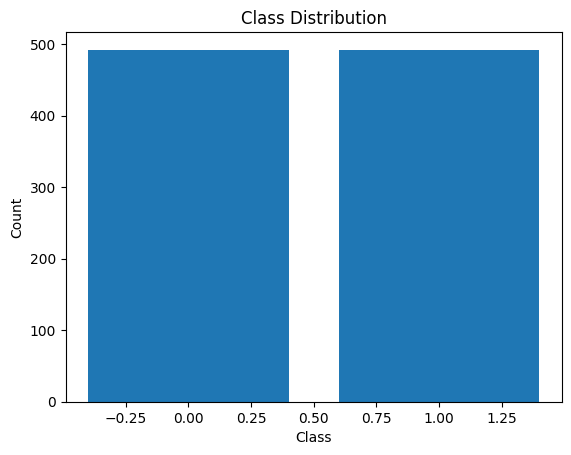

In [8]:
balanced_counts = df['Class'].value_counts()
plt.bar(balanced_counts.index, balanced_counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

We now want to find the correlations between the features and whether it is credit card fraud or not

In [9]:
correlation_matrix = df.corr()[['Class']]
print(correlation_matrix)

           Class
Time   -0.129097
V1     -0.418065
V2      0.474994
V3     -0.568405
V4      0.717355
V5     -0.376012
V6     -0.417675
V7     -0.478154
V8      0.061306
V9     -0.558071
V10    -0.625459
V11     0.687511
V12    -0.685276
V13    -0.054698
V14    -0.751736
V15    -0.063861
V16    -0.595832
V17    -0.556108
V18    -0.470201
V19     0.267418
V20     0.200866
V21     0.120510
V22     0.009022
V23    -0.022509
V24    -0.092291
V25    -0.003839
V26     0.077116
V27     0.095637
V28     0.092118
Amount  0.095183
Class   1.000000


The most positive correlation are V2, V4, and V11

The most negative correlation are V10, V12, and V14

We want to remove extreme outliers from the highest correlated features. To do this we use the interquartile range.

**Note: the models trained below are just samples, I have not done any form of tuning. Before this, I plan on scaling the amount/time columns, applying IQR to reduce some outliers, and possibly using a clustering algorithm before tuning.**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# initializing classifiers
knn = KNeighborsClassifier()
lr = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [12]:
# knn prediction
from sklearn.model_selection import cross_val_score
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('For KNN:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
score = knn.score(X_test, y_test)
print(score)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
training_score = cross_val_score(knn, X_train, y_train, cv=5)
print("Classifiers: ", knn.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

For KNN:
MAE: 0.34517766497461927
MSE: 0.34517766497461927
RMSE: 0.5875182252276259
0.6548223350253807
Accuracy: 0.6548223350253807
Classifiers:  KNeighborsClassifier Has a training score of 64.0 % accuracy score


In [13]:
# Logistic Regression prediction
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('For LR:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
score = lr.score(X_test, y_test)
print(score)

For LR:
MAE: 0.06598984771573604
MSE: 0.06598984771573604
RMSE: 0.25688489195695424
0.934010152284264


In [14]:
# SVC prediction
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('For svc:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
score = svc.score(X_test, y_test)
print(score)

For svc:
MAE: 0.45685279187817257
MSE: 0.45685279187817257
RMSE: 0.6759088635889994
0.5431472081218274


In [15]:
# Decision Tree prediction
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('For dt:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
score = dt.score(X_test, y_test)
print(score)

For dt:
MAE: 0.09137055837563451
MSE: 0.09137055837563451
RMSE: 0.30227563311592703
0.9086294416243654


In [16]:
# Random Forest prediction
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('For rf:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
score = rf.score(X_test, y_test)
print(score)

For rf:
MAE: 0.07614213197969544
MSE: 0.07614213197969544
RMSE: 0.2759386380695814
0.9238578680203046
